In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Timeseries techniques for handling missing value
# https://www.kaggle.com/code/juejuewang/handle-missing-values-in-time-series-for-beginners

# https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [9]:
df = pd.read_csv('VehicleTraffic.csv')

In [10]:
# View data
df

,TimeStamp,Vehicles
0,12/4/2018 1:00,95
1,12/4/2018 2:00,90
2,12/4/2018 3:00,98
3,12/4/2018 4:00,98
4,12/4/2018 7:00,84
5,12/4/2018 8:00,82
6,12/4/2018 9:00,77
7,12/4/2018 10:00,93


In [5]:
# Columns and data types
# Date is stored as string (default behavior)
df.dtypes

TimeStamp    object
Vehicles      int64
dtype: object

In [11]:
# Let's ask pandas to parse TimeStamp as date column 
# For timeseries data, use timestamp as index
# df = pd.read_csv('VehicleTraffic.csv', parse_dates=[0], index_col=0)
df = pd.read_csv('VehicleTraffic.csv', parse_dates=["TimeStamp"], index_col="TimeStamp")

In [12]:
df

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [15]:
# TimeStamp values are set as index and data type is datetime
df.index

DatetimeIndex(['2018-12-04 01:00:00', '2018-12-04 02:00:00',
               '2018-12-04 03:00:00', '2018-12-04 04:00:00',
               '2018-12-04 07:00:00', '2018-12-04 08:00:00',
               '2018-12-04 09:00:00', '2018-12-04 10:00:00'],
              dtype='datetime64[ns]', name='TimeStamp', freq=None)

In [18]:
# Vehicles column
df.dtypes

Vehicles    int64
dtype: object

In [19]:
df.index[:5]

DatetimeIndex(['2018-12-04 01:00:00', '2018-12-04 02:00:00',
               '2018-12-04 03:00:00', '2018-12-04 04:00:00',
               '2018-12-04 07:00:00'],
              dtype='datetime64[ns]', name='TimeStamp', freq=None)

In [22]:
# With TimeStamp as index, it is very easy to look for data by datetime
# For example, let's look for all data from 2018
df.loc['2018']

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [26]:

# Or data from December 2018
df.loc['2018-12']

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [27]:
# Data between two datetime value
df.loc['2018-12-04 02':'2018-12-04 03']

,Vehicles
TimeStamp,
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98


In [28]:
# Or specific date and time
df.loc['2018-12-04 02']

Vehicles    90
Name: 2018-12-04 02:00:00, dtype: int64

In [29]:
# Or starting with specific date and time
df.loc['2018-12-04 02':]

,Vehicles
TimeStamp,
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


<Axes: xlabel='TimeStamp'>

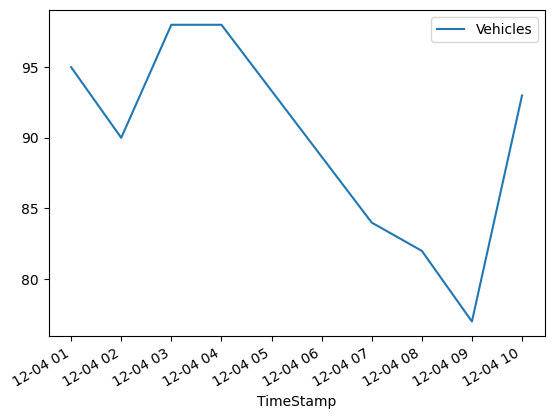

In [31]:
# Plot the data
# X-axis: TimeStamp
# y-axis: Vehicles
df.plot()
#df.plot(style='bo')

In [32]:
df.index.min()

Timestamp('2018-12-04 01:00:00')

In [33]:
list(df.Vehicles)

[95, 90, 98, 98, 84, 82, 77, 93]

In [34]:
df

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95
2018-12-04 02:00:00,90
2018-12-04 03:00:00,98
2018-12-04 04:00:00,98
2018-12-04 07:00:00,84
2018-12-04 08:00:00,82
2018-12-04 09:00:00,77
2018-12-04 10:00:00,93


In [36]:
# TimeSeries has gaps - We don't have data for 5AM and 6AM
# Let's resample so that there is no gap in the timeseries
df.resample('1h').mean()

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95.0
2018-12-04 02:00:00,90.0
2018-12-04 03:00:00,98.0
2018-12-04 04:00:00,98.0
2018-12-04 05:00:00,NaN
2018-12-04 06:00:00,NaN
2018-12-04 07:00:00,84.0
2018-12-04 08:00:00,82.0
2018-12-04 09:00:00,77.0


In [37]:
df_resampled = df.resample('1h').mean()

In [38]:
df_resampled

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95.0
2018-12-04 02:00:00,90.0
2018-12-04 03:00:00,98.0
2018-12-04 04:00:00,98.0
2018-12-04 05:00:00,NaN
2018-12-04 06:00:00,NaN
2018-12-04 07:00:00,84.0
2018-12-04 08:00:00,82.0
2018-12-04 09:00:00,77.0


<Axes: xlabel='TimeStamp'>

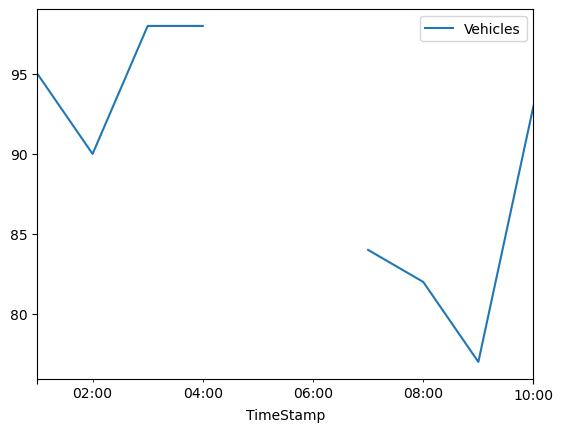

In [40]:
# Now we can see the missing values
df_resampled.plot()

In [41]:
df_resampled.index.min()

Timestamp('2018-12-04 01:00:00', freq='H')

In [42]:
list(df_resampled.Vehicles)

[95.0, 90.0, 98.0, 98.0, nan, nan, 84.0, 82.0, 77.0, 93.0]

<h2>Working With Missing Data</h2>
Let's see how we can handle the missing values  
We will look at forward fill, backfill, linear interpolation and quadratic interpolation  

https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [43]:
df_resampled

,Vehicles
TimeStamp,
2018-12-04 01:00:00,95.0
2018-12-04 02:00:00,90.0
2018-12-04 03:00:00,98.0
2018-12-04 04:00:00,98.0
2018-12-04 05:00:00,NaN
2018-12-04 06:00:00,NaN
2018-12-04 07:00:00,84.0
2018-12-04 08:00:00,82.0
2018-12-04 09:00:00,77.0


In [44]:
# Forward Fill values
df_resampled['ffill'] = df_resampled['Vehicles'].fillna(method='ffill')
# Back fill values
df_resampled['bfill'] = df_resampled['Vehicles'].fillna(method='bfill')
# Interpolate missing values
# Linear
df_resampled['linear'] = df_resampled['Vehicles'].interpolate()
df_resampled['quadratic'] = df_resampled['Vehicles'].interpolate(method='quadratic')

In [45]:
df_resampled

,Vehicles,ffill,bfill,linear,quadratic
TimeStamp,,,,,
2018-12-04 01:00:00,95.0,95.0,95.0,95.000000,95.000000
2018-12-04 02:00:00,90.0,90.0,90.0,90.000000,90.000000
2018-12-04 03:00:00,98.0,98.0,98.0,98.000000,98.000000
2018-12-04 04:00:00,98.0,98.0,98.0,98.000000,98.000000
2018-12-04 05:00:00,NaN,98.0,84.0,93.333333,93.898529
2018-12-04 06:00:00,NaN,98.0,84.0,88.666667,87.719892
2018-12-04 07:00:00,84.0,84.0,84.0,84.000000,84.000000
2018-12-04 08:00:00,82.0,82.0,82.0,82.000000,82.000000
2018-12-04 09:00:00,77.0,77.0,77.0,77.000000,77.000000


<Axes: xlabel='TimeStamp'>

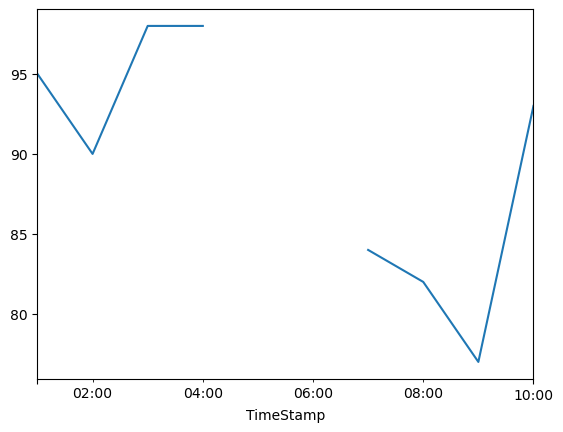

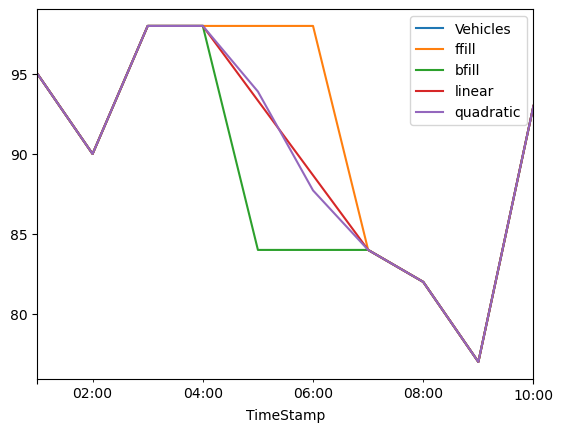

In [46]:
df_resampled['Vehicles'].plot()
df_resampled.plot()